# Q1

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Function for PDF in case A
def pdf_a(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Function for PDF in case B
def pdf_b(x):
    return np.sin(x**2 / 100) + 1 / np.cos(x**3 / 100) + x**-3



In [3]:
from scipy.integrate import quad
# Integrate PDF over specified intervals to find normalization factors

# Case A: Integrate over [-5, 5]
integral_a, error_a = quad(pdf_a, -5, 5)
normalization_factor_a = 1 / integral_a

# Case B: Integrate over [1, 5]
integral_b, error_b = quad(pdf_b, 1, 5)
normalization_factor_b = 1 / integral_b

print(f"Normalization factor for Case A: {normalization_factor_a}")
print(f"Normalization factor for Case B: {normalization_factor_b}")



Normalization factor for Case A: 1.0000005733034723
Normalization factor for Case B: 0.17190904933938936


In [4]:
def pdf_b(x):
    return (np.sin(x**2 / 100) + 1 / np.cos(x**3 / 100) + x**-3) * normalization_factor_b


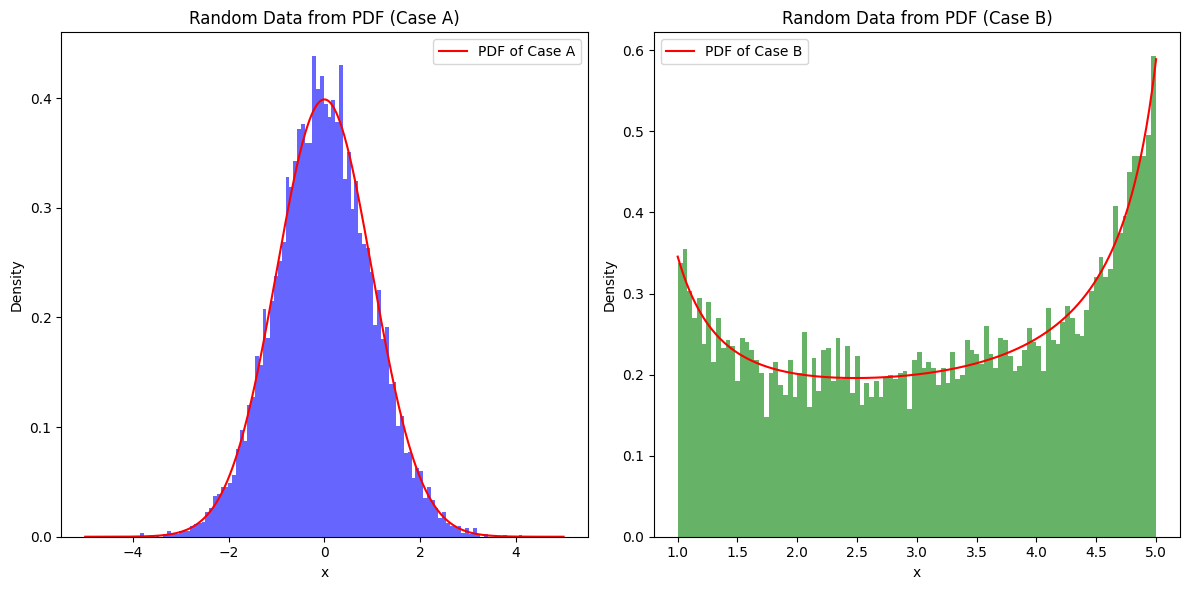

In [5]:
# Generate random data for case A
def generate_data_a(N):
    data = []
    x_min, x_max = -5, 5
    max_pdf_a = pdf_a(0)  # Maximum of the Gaussian function in the interval
    while len(data) < N:
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(0, max_pdf_a)
        if y < pdf_a(x):
            data.append(x)
    return np.array(data)

# Generate random data for case B
def generate_data_b(N):
    data = []
    x_min, x_max = 1, 5
    max_pdf_b = 0.6 # This is an approximation
    while len(data) < N:
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(0, max_pdf_b)
        if y < pdf_b(x):
            data.append(x)
    return np.array(data)

# Define parameters
N = 10000  # Size of generated data

# Generate data
data_a = generate_data_a(N)
data_b = generate_data_b(N)

# Plot histograms
plt.figure(figsize=(12, 6))

# Plot for Case A
plt.subplot(1, 2, 1)
plt.hist(data_a, bins=100, density=True, alpha=0.6, color='b')
x_vals = np.linspace(-5, 5, 500)
plt.plot(x_vals, pdf_a(x_vals), 'r', label='PDF of Case A')
plt.title("Random Data from PDF (Case A)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

# Plot for Case B
plt.subplot(1, 2, 2)
plt.hist(data_b, bins=100, density=True, alpha=0.6, color='g')
x_vals = np.linspace(1, 5, 500)
plt.plot(x_vals, pdf_b(x_vals), 'r', label='PDF of Case B')
plt.title("Random Data from PDF (Case B)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


# Q2

In [6]:
import numpy as np

# Load the data from the provided files
data_02 = np.loadtxt('Data_5/0.2.txt')
data_05 = np.loadtxt('Data_5/0.5.txt')


In [7]:

# Calculate means
mean_02 = np.mean(data_02)
mean_05 = np.mean(data_05)

# Calculate the numerator for the Pearson correlation (covariance term)
numerator_02_05 = np.sum((data_02 - mean_02) * (data_05 - mean_05))
numerator_02_02 = np.sum((data_02 - mean_02) ** 2)
numerator_05_05 = np.sum((data_05 - mean_05) ** 2)

# Calculate the standard deviations
std_02 = np.sqrt(numerator_02_02)
std_05 = np.sqrt(numerator_05_05)

# Calculate the Pearson correlation coefficients
correlation_02_05 = numerator_02_05 / (std_02 * std_05)
correlation_02_02 = numerator_02_02 / (std_02 ** 2)
correlation_05_05 = numerator_05_05 / (std_05 ** 2)

correlation_02_05, correlation_02_02, correlation_05_05


(0.08049568912299221, 1.0, 1.0)

# Q3

In [8]:
# Calculating C(τ) for 0.2.txt, 0.5.txt, and 0.8.txt datasets

data_08 = np.loadtxt('Data_5/0.8.txt')

# Define a function to compute the C(τ)
def C(data, max_lag):
    n = len(data)
    mean_data = np.mean(data)
    autocorr = []

    for tau in range(max_lag + 1):
        product_sum = np.mean((data[:n - tau]) * (data[tau:]))
        autocorr.append(product_sum)

    return autocorr

# Define maximum tau
max_tau = 500  

# Calculate C(τ) for each dataset
C_02 = C(data_02, max_tau)
C_05 = C(data_05, max_tau)
C_08 = C(data_08, max_tau)



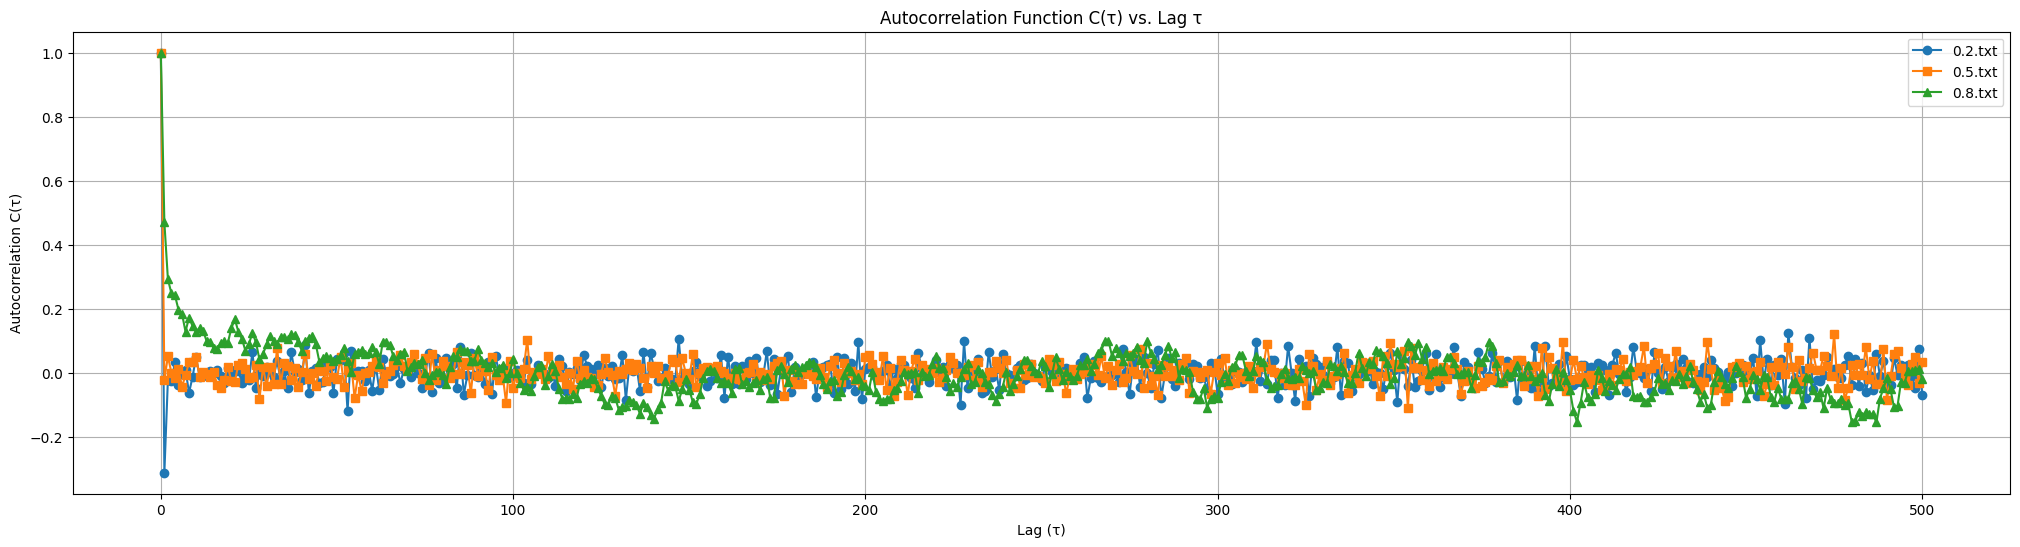

In [9]:
import matplotlib.pyplot as plt


taus = list(range(max_tau + 1))

# Plot C(τ) for each dataset
plt.figure(figsize=(25, 6))
plt.plot(taus, C_02, label="0.2.txt", marker='o')
plt.plot(taus, C_05, label="0.5.txt", marker='s')
plt.plot(taus, C_08, label="0.8.txt", marker='^')

# Labeling the plot
plt.title("Autocorrelation Function C(τ) vs. Lag τ")
plt.xlabel("Lag (τ)")
plt.ylabel("Autocorrelation C(τ)")
plt.legend()
plt.grid(True)
plt.show()


#### High 𝐶(𝜏)
C(τ) for small 𝜏: Indicates a strong temporal correlation, meaning values close in time are similar.
#### Low 𝐶(𝜏)
C(τ) as 𝜏 increases: Indicates diminishing correlation as time progresses, suggesting the signal becomes less predictable over longer lags.

# Q4

In [10]:
def round(x):
    """Round a number down to the nearest integer if it's negative."""
    if x >= 0:
        return int(x)
    else:
        return int(x) - 1


def H_1p(x, dx):
    """Compute the 1-point probability density function (PDF) for a dataset x with bin width dx."""
    # Calculate the number of bins needed
    n = int((x.max() - x.min()) / dx) + 1

    # Initialize an array to store the PDF values
    pdf = np.zeros(n)

    # Shift x values to start from zero for binning
    x -= x.min()

    # Count occurrences in each bin
    for i in range(len(x)):
        j = round(x[i] / dx)
        pdf[j] += 1  

    # Normalize PDF by total count and bin width to ensure it sums to 1
    pdf /= (np.sum(pdf) * dx)  
    
    #H = -np.sum(pdf * np.log(pdf))
    H = -np.sum(pdf[pdf > 0] * np.log(pdf[pdf > 0]))
    
    return H


def H_2p(x, y, dx, dy):
    """Compute the 2-point joint PDF for datasets x and y with bin widths dx and dy."""
    # Calculate the number of bins needed for x and y
    numx = int((x.max() - x.min()) / dx) + 1
    numy = int((y.max() - y.min()) / dy) + 1

    # Initialize a 2D array to store the joint PDF values
    pdf = np.zeros((numx, numy))

    # Shift x and y values to start from zero for binning
    x -= x.min()
    y -= y.min()

    # Loop over x and y values to populate the joint PDF
    for i in range(len(x)):
        j1 = round(x[i] / dx)
        j2 = round(y[i] / dy)
        pdf[j1, j2] += 1

    # Normalize joint PDF by total count and bin areas to ensure it sums to 1
    pdf /= (np.sum(pdf) * dx * dy)
    
    #H = -np.sum(pdf * np.log(pdf))
    H = -np.sum(pdf[pdf > 0] * np.log(pdf[pdf > 0]))

    return H

# Function to calculate mutual information
def mutual_information(data_x, data_y, dx, dy):
    
    H_X = H_1p(data_x, dx)
    H_Y = H_1p(data_y, dy)
    H_XY = H_2p(data_x, data_y, dx, dy)
    I_XY = H_X + H_Y - H_XY
    
    return I_XY
    
dx = 0.01
MI_25 = mutual_information(data_02, data_05, dx, dx)
MI_28 = mutual_information(data_02, data_08, dx, dx)
MI_85 = mutual_information(data_08, data_05, dx, dx)
MI_22 = mutual_information(data_02, data_02, dx, dx)
MI_55 = mutual_information(data_05, data_05, dx, dx)
MI_88 = mutual_information(data_08, data_08, dx, dx)

print(f' Mutual Information for 0.2.txt and 0.5.txt =', MI_25)
print(f' Mutual Information for 0.2.txt and 0.8.txt =', MI_28)
print(f' Mutual Information for 0.8.txt and 0.5.txt =', MI_85)
print(f' Mutual Information for 0.2.txt and 0.2.txt =', MI_22)
print(f' Mutual Information for 0.5.txt and 0.5.txt =', MI_55)
print(f' Mutual Information for 0.8.txt and 0.8.txt =', MI_88)

 Mutual Information for 0.2.txt and 0.5.txt = 23040.28183708725
 Mutual Information for 0.2.txt and 0.8.txt = 23104.788649055914
 Mutual Information for 0.8.txt and 0.5.txt = 23067.721903333924
 Mutual Information for 0.2.txt and 0.2.txt = 35224.036390051995
 Mutual Information for 0.5.txt and 0.5.txt = 34876.39639493574
 Mutual Information for 0.8.txt and 0.8.txt = 35188.36394845862


# Q5

In [11]:

# Pearson correlation function
def pearson_correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    
    rho_p = numerator / denominator
    return rho_p

# Spearman correlation function
def spearman_correlation(x, y):
    # Rank the data
    ranks_x = np.argsort(np.argsort(x)) + 1  # Compute ranks for x
    ranks_y = np.argsort(np.argsort(y)) + 1  # Compute ranks for y
    
    # Calculate the differences in ranks
    d = ranks_x - ranks_y
    d_squared = d ** 2
    
    # Calculate Spearman's coefficient
    N = len(x)
    rho_s = 1 - (6 * np.sum(d_squared)) / (N * (N**2 - 1))
    return rho_s

# List of dataset pairs to compare
pairs = [
    ("0.2.txt", data_02, "0.5.txt", data_05),
    ("0.2.txt", data_02, "0.8.txt", data_08),
    ("0.8.txt", data_08, "0.5.txt", data_05),
    ("0.5.txt", data_05, "0.5.txt", data_05)
]

# Calculate and print the correlations for each dataset pair
for name1, data1, name2, data2 in pairs:
    pearson_corr = pearson_correlation(data1, data2)
    spearman_corr = spearman_correlation(data1, data2)
    print(f"Pearson correlation between {name1} and {name2}: {pearson_corr}")
    print(f"Spearman correlation between {name1} and {name2}: {spearman_corr}")


Pearson correlation between 0.2.txt and 0.5.txt: 0.08049568912299221
Spearman correlation between 0.2.txt and 0.5.txt: 0.07097849313353832
Pearson correlation between 0.2.txt and 0.8.txt: -0.020389936658351003
Spearman correlation between 0.2.txt and 0.8.txt: -0.011936623810886227
Pearson correlation between 0.8.txt and 0.5.txt: -0.0156085973117271
Spearman correlation between 0.8.txt and 0.5.txt: 0.014292711984121298
Pearson correlation between 0.5.txt and 0.5.txt: 1.0
Spearman correlation between 0.5.txt and 0.5.txt: 1.0
